# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pkg_resources
import types

#SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, TimeSeriesSplit
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, plot_roc_curve, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans ,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# mlxtend
from mlxtend.plotting import plot_decision_regions

#Yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pca import PCADecomposition

# lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

# XGBoost
from xgboost import XGBClassifier

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Package versions**

In [202]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
for r in requirements:
    print("{}=={}".format(*r))

yellowbrick==1.1
xgboost==1.0.2
seaborn==0.10.0
scikit-learn==0.22.2.post1
pandas==1.0.3
numpy==1.18.2
matplotlib==3.2.1
lightgbm==2.3.1


# Exploratory Data Analysis

Setting config to always display all columns:

In [2]:
pd.options.display.max_columns = None

Reading dataset:

In [6]:
rain = pd.read_csv('../data/rain_data_aus.csv')

In [7]:
rain.shape

(142193, 23)

In [8]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


There are 4 object columns: 

In [9]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

Looking for missing values

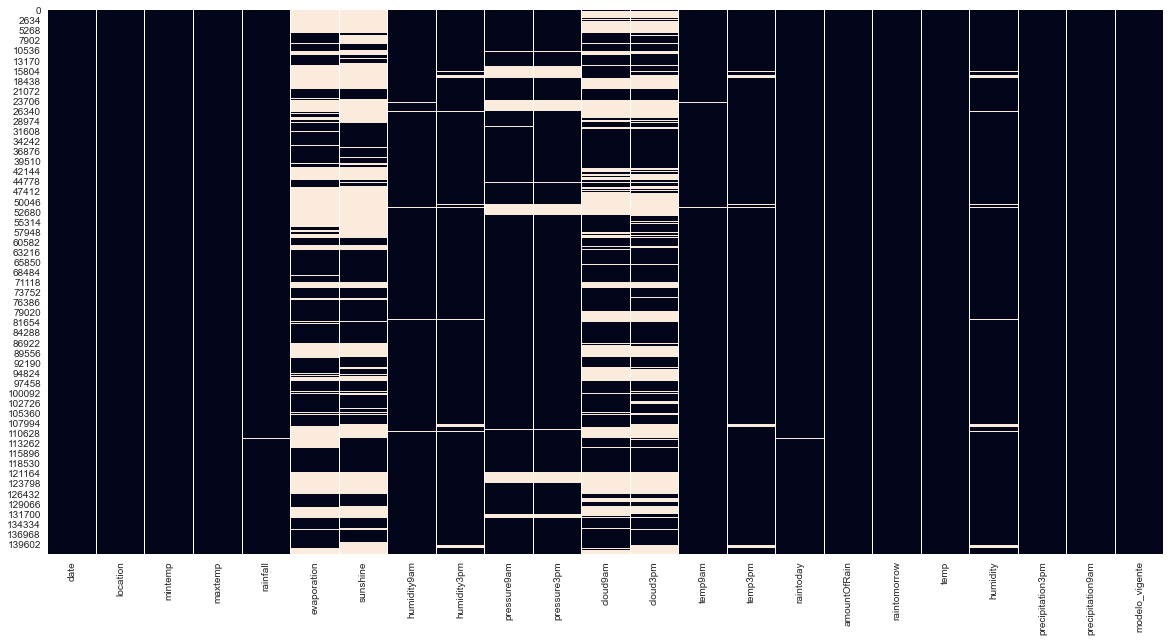

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(rain.isnull(), cbar=False);

In [11]:
rain.select_dtypes(include='object').columns

Index(['date', 'location', 'raintoday', 'raintomorrow'], dtype='object')

In [12]:
rain.isnull().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

# Simple Baseline

Create a simple logistic regression baseline

## Treating missing values

Droping columns with high missing values:
more than 1/3 of missing values

In [13]:
nan = rain.isnull().sum()
cols_to_drop = []

for i, value in enumerate(nan.values):
    if value > rain.shape[0]/3:
        cols_to_drop.append(nan.index[i])
        
cols_to_drop

['evaporation', 'sunshine', 'cloud9am', 'cloud3pm']

In [14]:
rain = rain.drop(cols_to_drop, axis=1)

In [15]:
rain.shape

(142193, 19)

We also decided to drop 'pressure9am' and 'pressure3pm' columns for now

In [16]:
#Almost 10% of null values
rain['pressure9am'].isnull().value_counts(normalize=True)

False    0.901444
True     0.098556
Name: pressure9am, dtype: float64

In [17]:
#Almost 10% of null values too
rain['pressure3pm'].isnull().value_counts(normalize=True)

False    0.901676
True     0.098324
Name: pressure3pm, dtype: float64

Grouping by location we can see that some cities do not record the values of these features. Despite the possible relevance of these features, we decided to drop the columns to make a baseline and later we will check these columns. We chose to drop the columns instead of the rows because by dropping the rows we could lose all values for those cities.

In [18]:
rain.groupby(by= 'location')[['pressure9am', 'pressure3pm']].describe()

pressure9am                                                   \
                       count         mean       std    min       25%      50%   
location                                                                        
Adelaide              3082.0  1018.727579  7.357987  982.3  1013.700  1018.70   
Albany                2991.0  1018.283049  7.251447  989.2  1013.600  1018.50   
Albury                3011.0  1018.367253  7.361457  989.8  1013.400  1018.40   
AliceSprings          3030.0  1016.699670  6.409189  997.7  1011.725  1016.70   
BadgerysCreek         2785.0  1018.450880  7.014221  996.8  1013.900  1018.60   
Ballarat              3004.0  1017.855293  7.611270  989.4  1012.900  1017.90   
Bendigo               3020.0  1018.024272  7.448458  989.5  1013.000  1018.10   
Brisbane              3161.0  1018.246947  5.461651  997.8  1014.600  1018.30   
Cairns                2988.0  1014.154284  4.183403  994.4  1011.400  1014.70   
Canberra              3194.0  1018.986725  7.492871  987.4  1013.925  1018.90   
Cobar                 2961.0  1017.995137  6.462880  991.7  1013.300  1017.90   
CoffsHarbour          2688.0  1018.222731  6.076822  998.3  1014.100  1018.30   
Dartmoor              2942.0  1017.997621  7.962654  986.2  1012.800  1018.20   
Darwin                3191.0  1011.888154  3.355192  996.3  1009.600  1012.20   
GoldCoast             2980.0  1017.932081  5.457297  999.5  1014.200  1017.90   
Hobart                3187.0  1014.526828  9.964205  982.2  1008.200  1015.40   
Katherine             1558.0  1012.840244  3.797706  998.9  1010.125  1013.00   
Launceston            1882.0  1015.666578  9.238052  985.0  1009.900  1016.35   
Melbourne             2434.0  1017.732580  7.834652  988.9  1012.625  1018.00   
MelbourneAirport      3009.0  1018.087670  7.682523  989.7  1013.100  1018.30   
Mildura               3003.0  1018.771029  7.053044  991.3  1013.900  1018.70   
Moree                 2854.0  1018.309706  5.952067  999.0  1014.000  1018.30   
MountGambier          3029.0  1017.940112  7.934820  985.1  1012.800  1018.20   
MountGinini              0.0          NaN       NaN    NaN       NaN      NaN   
Newcastle                0.0          NaN       NaN    NaN       NaN      NaN   
Nhil                  1569.0  1018.546335  7.543523  986.9  1013.500  1018.50   
NorahHead             2917.0  1018.259033  6.732356  996.5  1013.900  1018.30   
NorfolkIsland         2956.0  1017.631360  5.510219  980.5  1014.200  1018.00   
Nuriootpa             2995.0  1018.915793  7.154657  982.0  1014.100  1018.80   
PearceRAAF            2744.0  1017.746902  6.311765  996.9  1013.200  1017.50   
Penrith                  0.0          NaN       NaN    NaN       NaN      NaN   
Perth                 3192.0  1017.784398  6.523240  996.2  1013.100  1017.40   
PerthAirport          3007.0  1017.890323  6.429501  996.7  1013.300  1017.60   
Portland              2984.0  1017.686260  8.091115  986.7  1012.400  1018.10   
Richmond              2931.0  1018.705527  7.028448  997.0  1014.100  1018.80   
Sale                  2986.0  1017.827294  8.020095  989.3  1012.700  1018.20   
SalmonGums               0.0          NaN       NaN    NaN       NaN      NaN   
Sydney                3317.0  1018.346156  7.021571  986.7  1013.700  1018.60   
SydneyAirport         2997.0  1018.360594  6.979996  996.3  1013.800  1018.50   
Townsville            3033.0  1015.173129  4.590418  994.3  1012.000  1015.60   
Tuggeranong           2983.0  1018.521623  7.571827  992.8  1013.300  1018.40   
Uluru                 1518.0  1017.109881  6.437819  994.6  1012.300  1017.10   
WaggaWagga            2976.0  1018.569120  7.077536  991.5  1013.700  1018.40   
Walpole               2817.0  1017.845651  7.099440  988.9  1013.300  1018.10   
Watsonia              2999.0  1018.035178  7.701749  989.7  1012.950  1018.20   
Williamtown           2543.0  1018.365906  6.579661  997.8  1014.000  1018.50   
Witchcliffe           2819.0  1018.473643  6.701

In [19]:
rain = rain.drop(['pressure9am','pressure3pm'], axis=1)

Now let's drop the rows that contain missing values

In [20]:
rain = rain.dropna()

In [21]:
rain.shape

(136489, 17)

Let's check if there are still any missing values

In [22]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136489 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              136489 non-null  object 
 1   location          136489 non-null  object 
 2   mintemp           136489 non-null  float64
 3   maxtemp           136489 non-null  float64
 4   rainfall          136489 non-null  float64
 5   humidity9am       136489 non-null  float64
 6   humidity3pm       136489 non-null  float64
 7   temp9am           136489 non-null  float64
 8   temp3pm           136489 non-null  float64
 9   raintoday         136489 non-null  object 
 10  amountOfRain      136489 non-null  float64
 11  raintomorrow      136489 non-null  object 
 12  temp              136489 non-null  float64
 13  humidity          136489 non-null  float64
 14  precipitation3pm  136489 non-null  int64  
 15  precipitation9am  136489 non-null  float64
 16  modelo_vigente    13

## Treating object columns

In [23]:
rain.select_dtypes(include='object').columns

Index(['date', 'location', 'raintoday', 'raintomorrow'], dtype='object')

Transform date into datetime values

In [24]:
rain['date'] = pd.to_datetime(rain.date)

Transform binary values of 'raintoday' and 'raintomorrow' into 0 and 1

In [25]:
rain['raintoday'] = rain.raintoday.apply(lambda x: 0 if x == 'No' else 1)

In [26]:
rain['raintomorrow'] = rain.raintomorrow.apply(lambda x: 0 if x == 'No' else 1)

In [27]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136489 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              136489 non-null  datetime64[ns]
 1   location          136489 non-null  object        
 2   mintemp           136489 non-null  float64       
 3   maxtemp           136489 non-null  float64       
 4   rainfall          136489 non-null  float64       
 5   humidity9am       136489 non-null  float64       
 6   humidity3pm       136489 non-null  float64       
 7   temp9am           136489 non-null  float64       
 8   temp3pm           136489 non-null  float64       
 9   raintoday         136489 non-null  int64         
 10  amountOfRain      136489 non-null  float64       
 11  raintomorrow      136489 non-null  int64         
 12  temp              136489 non-null  float64       
 13  humidity          136489 non-null  float64       
 14  prec

Location columns:

In [28]:
rain['location'].value_counts()

Canberra            3328
Sydney              3308
Darwin              3188
Perth               3180
Hobart              3164
Brisbane            3120
Townsville          3026
Bendigo             3022
AliceSprings        3018
Adelaide            3012
PerthAirport        3008
Launceston          3006
MountGambier        3005
Mildura             3000
MelbourneAirport    2999
SydneyAirport       2997
Ballarat            2993
Albury              2981
Watsonia            2972
Sale                2967
Cairns              2963
Nuriootpa           2962
WaggaWagga          2955
Woomera             2950
Tuggeranong         2943
NorfolkIsland       2937
SalmonGums          2934
Wollongong          2926
Portland            2919
CoffsHarbour        2917
GoldCoast           2913
NorahHead           2875
Richmond            2863
Cobar               2860
Penrith             2844
BadgerysCreek       2842
Moree               2783
Dartmoor            2770
Walpole             2726
Witchcliffe         2678


We will deal with the 'location' column later

## Baseline Model

### Logistic Regression Model

We decided to make a baseline first with all the columns and applying a logistic regression.

In [29]:
model = LogisticRegression(n_jobs= -1)

### Divide Train X Test

In [30]:
y = rain['raintomorrow']

In [31]:
X = rain[['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
       'humidity3pm', 'temp9am', 'temp3pm', 'amountOfRain',
       'temp', 'humidity', 'precipitation3pm', 'precipitation9am']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

### Training Model

In [33]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
model.predict_proba(X_test)

array([[9.99999996e-01, 4.41826201e-09],
       [9.99999976e-01, 2.44524085e-08],
       [9.99999906e-01, 9.38131308e-08],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [9.99932991e-01, 6.70090282e-05],
       [9.99999976e-01, 2.38142207e-08]])

### Accuracy Score

In [37]:
baseline_score = model.score(X_test, y_test)
baseline_score

0.9958238698805774

In [38]:
model.score(X_train, y_train)

0.9956406663552857

The score is too high! What's happening? Let's explore:

In [39]:
rain.raintomorrow.value_counts()

0    106392
1     30097
Name: raintomorrow, dtype: int64

In [40]:
rain.raintomorrow.value_counts()[1]/rain.raintomorrow.value_counts()[0]

0.28288781111361755

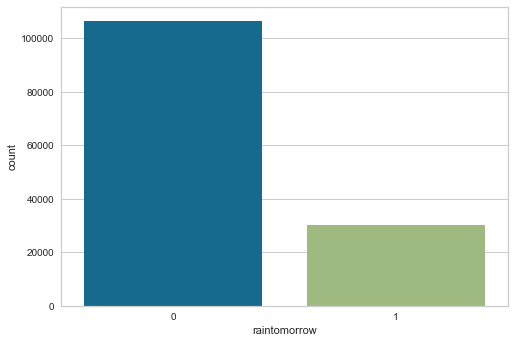

In [41]:
sns.countplot(rain['raintomorrow'],)

We see that our dataset is a little bit unbalanced, we probably will have to deal with recall issues later on

### Confusion Matrix

In [42]:
confusion_matrix(y_test, model.predict(X_test))

array([[21241,    54],
       [   60,  5943]])

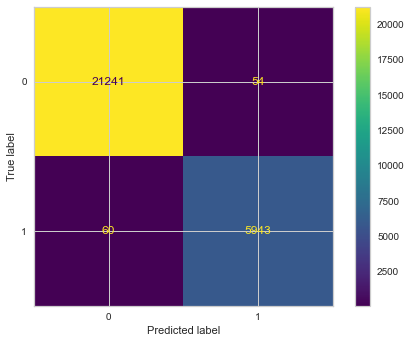

In [43]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

Recall X Precision

In [44]:
baseline_precision = precision_score(y_test, model.predict(X_test))
baseline_precision

0.9909954977488744

In [45]:
baseline_recall = recall_score(y_test, model.predict(X_test))
baseline_recall

0.9900049975012494

Roc Curve

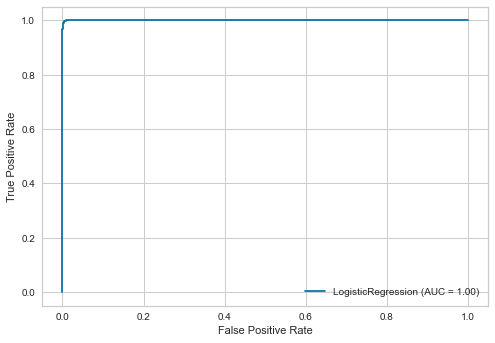

In [46]:
plot_roc_curve(model, X_test, y_test);

All the scores, including AUC are too high. Something's not right

### Investigating further

In [47]:
X_test.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'amountOfRain', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am'],
      dtype='object')

Importância de cada variável usada no modelo:

In [48]:
list(zip(list(X.columns), list(model.coef_[0])))

[('mintemp', 0.2780911757755209),
 ('maxtemp', -0.32767515267948977),
 ('rainfall', 0.011648535110361877),
 ('humidity9am', -0.060906132962696154),
 ('humidity3pm', -0.053128920861021556),
 ('temp9am', -0.12508233239971045),
 ('temp3pm', -0.007223462319096372),
 ('amountOfRain', 15.38513628553571),
 ('temp', 0.011677799669212334),
 ('humidity', -0.003293671311192174),
 ('precipitation3pm', -0.1817272021189052),
 ('precipitation9am', -0.08395588077839851)]

In [ ]:
### 
rain.head()

The feature 'amountOfRain' explains basically by itself the target 'raintomorrow'. We are leaking the data about tomorrow. In "real life" we woudn't have the column "RainTomorrow" if we wanted to predict if it's going to rain tomorrow.

## Scores DataFrame

Creating a DataFrame to store every scores we get by testing models

In [49]:
def scores(Column, score, precision, recall):
    '''
    Append a new colum of scores into a dataframe of scores, use it to compare your models.
    
    Columns: Name of the columns/model
    score: Accuracy score
    precision: Precision Score
    recall: Recall Score
    '''
    
    df = pd.DataFrame({Column : [score,precision,recall]}, index=['SCORE', 'PRECISION', 'RECALL'])
    x = pd.concat([rain_scores, df], axis = 1)
    return x

Storing Baseline Scores

In [50]:
rain_scores = pd.DataFrame({'Baseline (Log. Regression)' : [baseline_score,baseline_precision, baseline_recall]}, index=['SCORE', 'PRECISION', 'RECALL'])
rain_scores

,Baseline (Log. Regression)
SCORE,0.995824
PRECISION,0.990995
RECALL,0.990005


# Baseline Model 2

## Standardizing Data

In [51]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

## Logistic Regression Model Without 'amountOfRain'

In [52]:
y = rain['raintomorrow']
X_2 = X_std[['humidity9am', 'humidity3pm', 'temp9am', 'rainfall',
             'temp3pm', 'precipitation3pm', 'precipitation9am']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [54]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
baseline2_score = model.score(X_test, y_test)
baseline2_score

0.8344201040369258

In [56]:
model.score(X_train, y_train)

0.8328433662115009

Without the "amountOfRain" feature we got a more realistic score.

### Confusion Matrix

In [57]:
confusion_matrix(y_test, model.predict(X_test))

array([[20456,   839],
       [ 3681,  2322]])

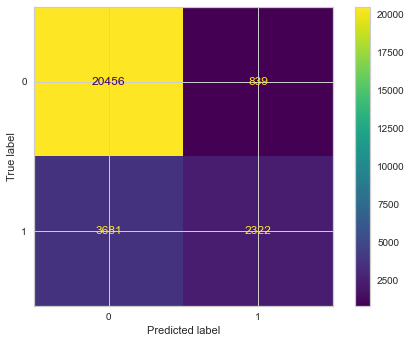

In [58]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

### Precision X Recall

Precision:

In [59]:
precision2_score = precision_score(y_test, model.predict(X_test))
precision2_score

0.7345776652957925

Recall:

In [60]:
recall2_score = recall_score(y_test, model.predict(X_test))
recall2_score

0.3868065967016492

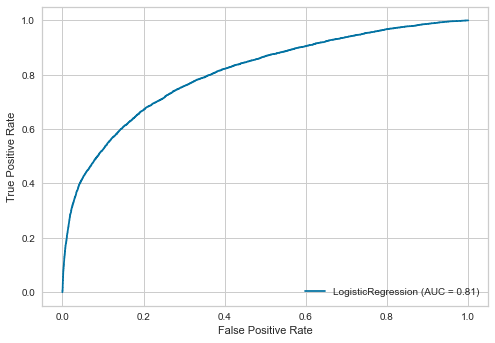

In [61]:
plot_roc_curve(model, X_test, y_test)

In [62]:
list(zip(list(X_2.columns), list(model.coef_[0])))

[('humidity9am', 0.02222601624886997),
 ('humidity3pm', 1.2155828731665654),
 ('temp9am', 0.35699563485171987),
 ('rainfall', 0.32276638961820436),
 ('temp3pm', -0.2665642766640515),
 ('precipitation3pm', 0.017384867001950206),
 ('precipitation9am', -0.01848696242245469)]

In [63]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,16.9,21.8,0,0.0,0,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,17.2,24.3,0,0.0,0,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,21.0,23.2,0,0.0,0,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,18.1,26.5,0,1.0,0,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,17.8,29.7,0,0.2,0,40.76,41.600000,9,11.883546,0.220164


## Conclusion

In [64]:
rain_scores = scores('Baseline 2 (Log. Regression)', baseline2_score, precision2_score, recall2_score)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression)
SCORE,0.995824,0.834420
PRECISION,0.990995,0.734578
RECALL,0.990005,0.386807


In [65]:
# Now we have a more realistic model to work on and set as a baseline to compare the other models

# Rain + Wind Speed

In [66]:
# Inserting the wind dataset to see how it affects the overall result:

In [67]:
rain = pd.read_csv('../data/rain_data_aus.csv')
wind = pd.DataFrame()
for i in range(1,9):
    df_aux = pd.read_csv(f'../data/wind_table_0{i}.csv')
    df_aux.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    wind = pd.concat([wind,df_aux])
rain_wind =  pd.merge(rain, wind, how='left', on=['date', 'location'])

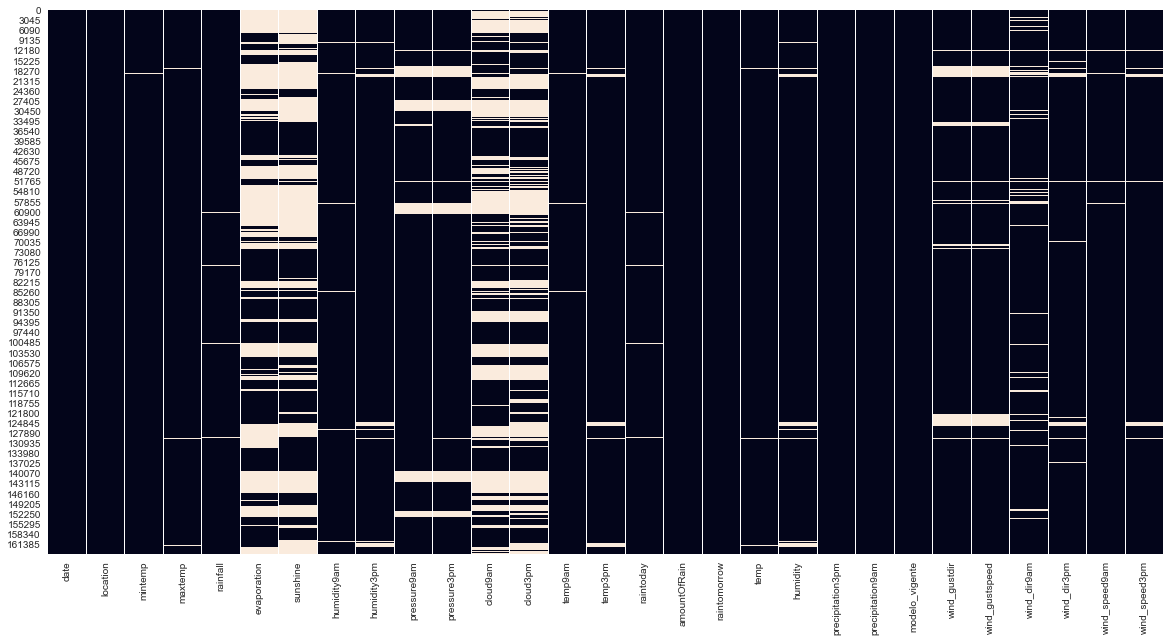

In [68]:
#Heatmap of nulls
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(rain_wind.isnull(), cbar=False);

In [69]:
#Droping columns and rows again
rain_wind.drop(['evaporation', 'sunshine', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm'], axis = 1, inplace = True)
rain_wind.dropna(axis=0, inplace=True)

In [70]:
X = rain_wind[['rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'precipitation3pm', 'precipitation9am',
        'wind_speed9am','wind_speed3pm']]

## Standardize Data

In [71]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [72]:
rain_wind['raintomorrow'] = rain_wind['raintomorrow'].apply(lambda x: 0 if x == 'No' else 1)

In [73]:
y = rain_wind['raintomorrow']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
wind_score = model.score(X_test, y_test)
wind_score

0.8295688614248171

In [76]:
model.score(X_train, y_train)

0.8334724318565213

In [77]:
wind_precision = precision_score(y_test, model.predict(X_test))
wind_precision

0.7166713840928389

In [78]:
wind_recall = recall_score(y_test, model.predict(X_test))
wind_recall

0.4

## Confusion Matrix

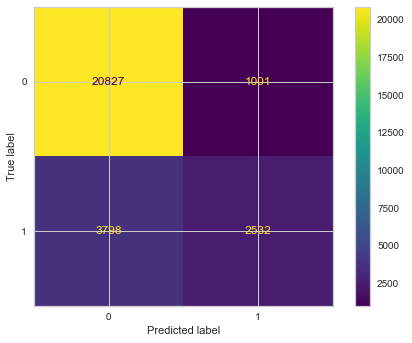

In [79]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

## Comparing Models

In [80]:
rain_scores = scores('Model 3 + Wind Speed (Log. Regression)', wind_score, wind_precision, wind_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression)
SCORE,0.995824,0.834420,0.829569
PRECISION,0.990995,0.734578,0.716671
RECALL,0.990005,0.386807,0.400000


# Rain + Wind Direction

In [81]:
rain = pd.read_csv('../data/rain_data_aus.csv')
wind = pd.DataFrame()
for i in range(1,9):
    df_aux = pd.read_csv(f'../data/wind_table_0{i}.csv')
    df_aux.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    wind = pd.concat([wind,df_aux])
rain_wind =  pd.merge(rain, wind, how='left', on=['date', 'location'])

Checking if there are dupplicated rows

In [82]:
rain_wind.duplicated().sum()

22193

In [83]:
rain_wind.shape

(164386, 29)

Droping duplicated rows

In [84]:
rain_wind.drop_duplicates(inplace=True)

In [85]:
rain_wind.shape

(142193, 29)

## Cleaning Dataset

### Treating object columns

Transform binary values of 'raintoday' and 'raintomorrow' into 0 and 1

In [86]:
rain_wind['raintoday'] = rain_wind['raintoday'].apply(lambda x: 0 if x == 'No' else 1)

In [87]:
rain_wind['raintomorrow'] = rain_wind['raintomorrow'].apply(lambda x: 0 if x == 'No' else 1)

Drop 'amountOfRain' column, because we won't use it in the model

In [88]:
rain_wind = rain_wind.drop(columns='amountOfRain')

Datetime column:

In [89]:
rain_wind['date'] = pd.to_datetime(rain_wind['date'])

Creating the columns: day, month, year separately

In [90]:
rain_wind['day'] = rain_wind['date'].dt.day
rain_wind['month'] = rain_wind['date'].dt.month
rain_wind['year'] = rain_wind['date'].dt.year

Drop the column 'date', because we don't need it anymore

In [91]:
rain_wind = rain_wind.drop(columns='date')

Get Dummies on the categorical features

In [92]:
rain_wind = pd.concat([rain_wind, pd.get_dummies(rain_wind['wind_dir9am'], prefix='wind_dir9am')], axis=1)

In [93]:
rain_wind = pd.concat([rain_wind, pd.get_dummies(rain_wind['wind_dir3pm'], prefix='wind_dir3pm')], axis=1)

Dropping columns:

In [94]:
rain_wind.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,day,month,year,wind_dir9am_E,wind_dir9am_ENE,wind_dir9am_ESE,wind_dir9am_N,wind_dir9am_NE,wind_dir9am_NNE,wind_dir9am_NNW,wind_dir9am_NW,wind_dir9am_S,wind_dir9am_SE,wind_dir9am_SSE,wind_dir9am_SSW,wind_dir9am_SW,wind_dir9am_W,wind_dir9am_WNW,wind_dir9am_WSW,wind_dir3pm_E,wind_dir3pm_ENE,wind_dir3pm_ESE,wind_dir3pm_N,wind_dir3pm_NE,wind_dir3pm_NNE,wind_dir3pm_NNW,wind_dir3pm_NW,wind_dir3pm_S,wind_dir3pm_SE,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW
0,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0,1,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0,2,12,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0,3,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0,4,12,2008,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0,5,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [95]:
rain_wind = rain_wind.drop(columns=['location', 'wind_dir9am', 'wind_dir3pm', 'evaporation', 
                                    'sunshine', 'wind_gustdir','mintemp', 'maxtemp', 
                                    'raintoday', 'temp', 'humidity', 'wind_gustspeed',
                                    'cloud3pm', 'cloud9am'])

In [96]:
rain_wind.shape

(142193, 48)

In [97]:
rain_wind = rain_wind.dropna()

In [98]:
rain_wind.shape

(124105, 48)

## Running Logistic Regression

In [99]:
logistic = LogisticRegression(n_jobs=-1)

In [100]:
rain_wind.head()

,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintomorrow,precipitation3pm,precipitation9am,modelo_vigente,wind_speed9am,wind_speed3pm,day,month,year,wind_dir9am_E,wind_dir9am_ENE,wind_dir9am_ESE,wind_dir9am_N,wind_dir9am_NE,wind_dir9am_NNE,wind_dir9am_NNW,wind_dir9am_NW,wind_dir9am_S,wind_dir9am_SE,wind_dir9am_SSE,wind_dir9am_SSW,wind_dir9am_SW,wind_dir9am_W,wind_dir9am_WNW,wind_dir9am_WSW,wind_dir3pm_E,wind_dir3pm_ENE,wind_dir3pm_ESE,wind_dir3pm_N,wind_dir3pm_NE,wind_dir3pm_NNE,wind_dir3pm_NNW,wind_dir3pm_NW,wind_dir3pm_S,wind_dir3pm_SE,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW
0,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,0,12,5.115360,0.089825,20.0,24.0,1,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,10,21.497100,0.023477,4.0,22.0,2,12,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,17,20.782859,0.027580,19.0,26.0,3,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,8,12.028646,0.023962,11.0,9.0,4,12,2008,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,9,11.883546,0.220164,7.0,20.0,5,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [101]:
y = rain_wind['raintomorrow']
X = rain_wind.loc[:, (rain_wind.columns!='raintomorrow') & (rain_wind.columns!='modelo_vigente')]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

In [103]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
logistic.score(X_train, y_train)

0.8399742153821361

In [105]:
wind_score = logistic.score(X_test, y_test)
wind_score

0.836428830425849

In [106]:
wind_precision = precision_score(y_test, logistic.predict(X_test))
wind_precision

0.712708830548926

In [107]:
wind_recall = recall_score(y_test, logistic.predict(X_test))
wind_recall

0.43547211082756104

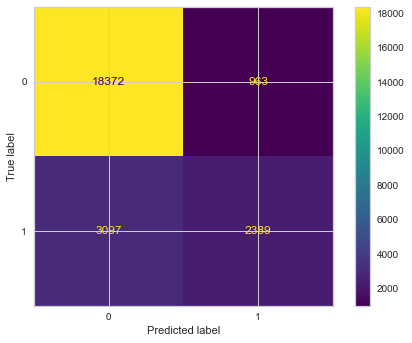

In [108]:
plot_confusion_matrix(logistic, X_test, y_test, values_format='.0f')

## Conclusion

After studying the impact of each wind direction separately (PCA), the conclusion was to include all of them.
Adding the direction features seem to add more information in order to enhance the result.

In [109]:
rain_scores = scores('Model 4 + Wind Speed (Log. Regression)', wind_score, wind_precision, wind_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression),Model 4 + Wind Speed (Log. Regression)
SCORE,0.995824,0.834420,0.829569,0.836429
PRECISION,0.990995,0.734578,0.716671,0.712709
RECALL,0.990005,0.386807,0.400000,0.435472


#  Decision Tree

In [111]:
# Studying the features behaviours through tree models

In [112]:
rain_wind.shape

(124105, 48)

In [113]:
y=rain_wind['raintomorrow']
X=rain_wind.drop(columns=['raintomorrow', 'modelo_vigente'])

In [114]:
# Spliting into Train vs. Test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

In [115]:
model = DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001,random_state=42)

In [116]:
# Running cross validation
scorings = ['accuracy', 'precision', 'recall', 'roc_auc']
mean_results = []

for scoring in scorings:
    results = cross_val_score(model, X_train, y_train, 
                              cv = KFold (10, shuffle=True),
                              scoring= scoring, 
                              n_jobs=-1)
    
    mean_results.append([np.mean(results), np.std(results)])

# Storing results in a DataFrame:
pd.DataFrame(mean_results, columns=['mean_dt1', 'std_dt1'], index=scorings)

,mean_dt1,std_dt1
accuracy,0.836701,0.002213
precision,0.705535,0.025603
recall,0.473639,0.037727
roc_auc,0.811240,0.006165


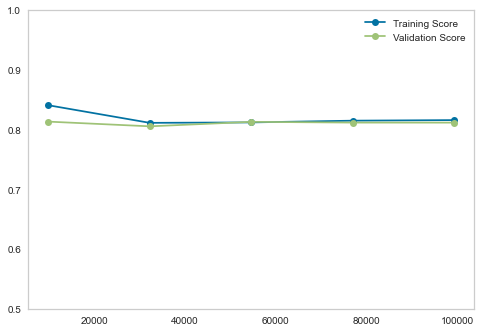

In [117]:
from sklearn.model_selection import learning_curve
curves = learning_curve(model, X, y, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

In [118]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

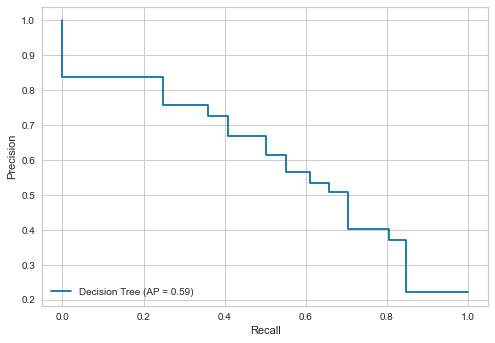

In [119]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X, y, name='Decision Tree')

In [120]:
score=model.score(X,y)

In [121]:
score_recall = recall_score(y, model.predict(X))
score_recall

0.407130618643141

In [122]:
precision_recall = precision_score(y, model.predict(X))
precision_recall

0.725666016894087

## Conclusion

In [123]:
rain_scores = scores('Model 5 - Decision Tree', score, precision_recall, score_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression),Model 4 + Wind Speed (Log. Regression),Model 5 - Decision Tree
SCORE,0.995824,0.834420,0.829569,0.836429,0.834938
PRECISION,0.990995,0.734578,0.716671,0.712709,0.725666
RECALL,0.990005,0.386807,0.400000,0.435472,0.407131


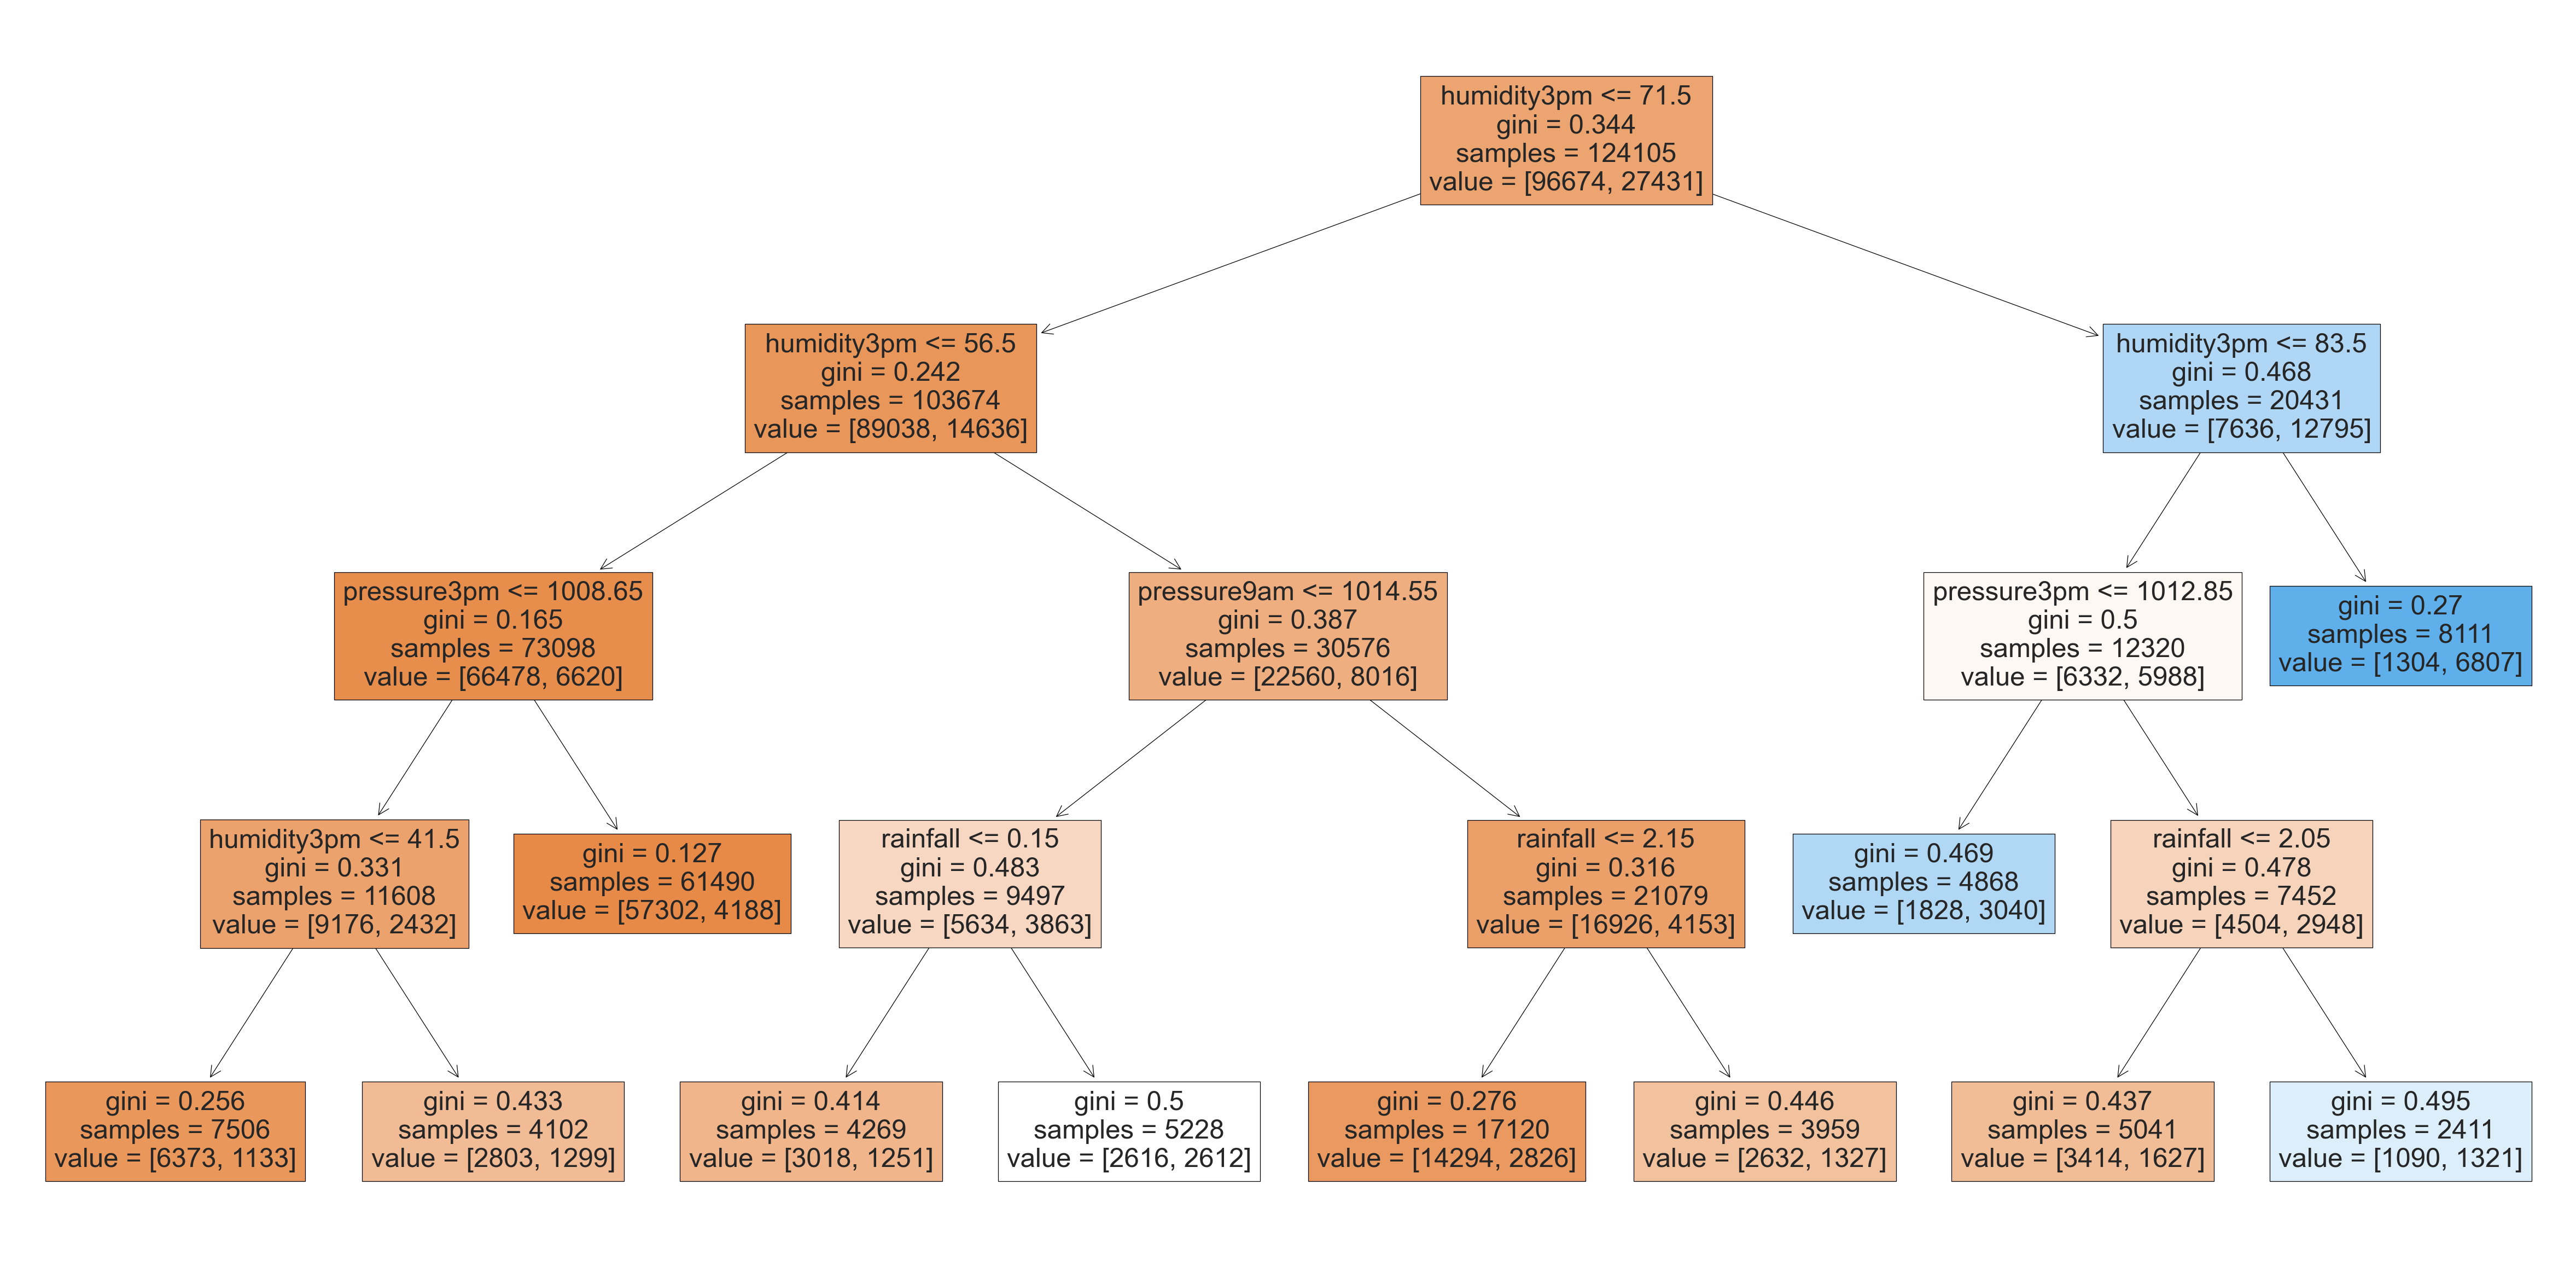

In [124]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,
                         figsize = (20,10), dpi=300)
plot_tree(model, filled=True,feature_names=X.columns);

In [125]:
# The following features showed to be the most relevant ones:
## * Pressure was droped in the first analysis

In [126]:
pd.DataFrame(zip(X.columns, model.feature_importances_)).sort_values(1, ascending=False).head(15)

,0,1
2,humidity3pm,0.853774
4,pressure3pm,0.055944
3,pressure9am,0.046102
0,rainfall,0.044181
35,wind_dir3pm_NNE,0.000000
27,wind_dir9am_W,0.000000
28,wind_dir9am_WNW,0.000000
29,wind_dir9am_WSW,0.000000
30,wind_dir3pm_E,0.000000
31,wind_dir3pm_ENE,0.000000


# Random Forest

In [127]:
y = rain_wind['raintomorrow']
X = rain_wind.loc[:, (rain_wind.columns!='raintomorrow') & (rain_wind.columns!='modelo_vigente')]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

In [129]:
forest = RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [130]:
from sklearn.model_selection import cross_val_score, KFold
results = cross_val_score(forest, X_train, y_train, cv=KFold(3, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8393753437311441, 0.0014506856656752599)

In [131]:
# Running cv
scorings = ['accuracy', 'precision', 'recall', 'roc_auc']
mean_results = []

for scoring in scorings:
    results = cross_val_score(forest, X_train, y_train, 
                              cv = KFold (5, shuffle=True),
                              scoring= scoring, 
                              n_jobs=-1)
    mean_results.append([np.mean(results), np.std(results)])

# Storing results in a DataFrame:
pd.DataFrame(mean_results, columns=['mean_forest', 'std_forest'], index=scorings)

,mean_forest,std_forest
accuracy,0.827293,0.003685
precision,0.845050,0.011882
recall,0.272600,0.014982
roc_auc,0.838759,0.005083


In [132]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [133]:
wind_score = forest.score(X_test, y_test)
wind_score

0.8238991176826075

In [134]:
score_recall = recall_score(y_test, forest.predict(X_test))
score_recall

0.25501275975209625

In [135]:
score_precision = precision_score(y_test, forest.predict(X_test))
score_precision

0.8312537136066548

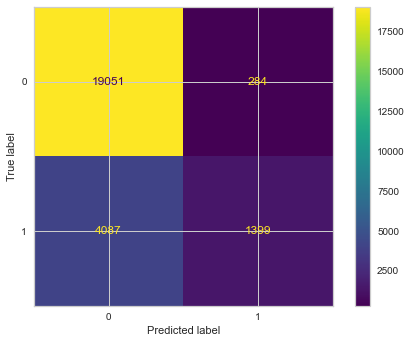

In [136]:
plot_confusion_matrix(forest, X_test, y_test, values_format='.0f')

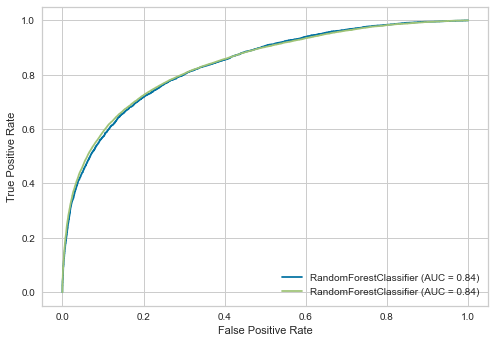

In [137]:
fig, ax = plt.subplots()

plot_roc_curve(forest, X_test, y_test, ax=ax)
plot_roc_curve(forest, X_train, y_train, ax=ax)

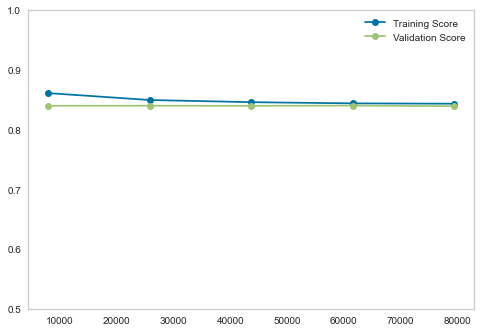

In [138]:
from sklearn.model_selection import learning_curve
curves = learning_curve(forest, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

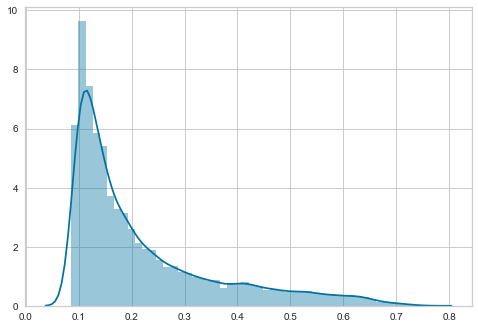

In [139]:
sns.distplot(forest.predict_proba(X_test)[:,1])

In [140]:
y_pred = forest.predict_proba(X_test)[:,1] > 0.3

In [141]:
confusion_matrix(y_test, y_pred)

array([[17197,  2138],
       [ 2233,  3253]])

## Conclusion

The logistic regression still seems to be the best option in terms of 'RECALL' scores

In [142]:
rain_scores = scores('Model 6 - Random Forest', wind_score, score_precision, score_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression),Model 4 + Wind Speed (Log. Regression),Model 5 - Decision Tree,Model 6 - Random Forest
SCORE,0.995824,0.834420,0.829569,0.836429,0.834938,0.823899
PRECISION,0.990995,0.734578,0.716671,0.712709,0.725666,0.831254
RECALL,0.990005,0.386807,0.400000,0.435472,0.407131,0.255013


Unlike the result from the Decision Tree model, this time, other features also showed some importance

In [143]:
pd.DataFrame(zip(X.columns, forest.feature_importances_)).sort_values(by=1, ascending=False).head(10)

,0,1
2,humidity3pm,0.374281
0,rainfall,0.198415
1,humidity9am,0.119805
3,pressure9am,0.099852
4,pressure3pm,0.088744
6,temp3pm,0.051830
5,temp9am,0.016656
9,wind_speed9am,0.012983
10,wind_speed3pm,0.011346
17,wind_dir9am_N,0.005615


# 'modelo_vigente' Comparation

In [144]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])

0.8380645244009695

In [145]:
modelo_vigente = np.array(rain_wind['modelo_vigente'])

In [146]:
roc_auc_score(y, modelo_vigente)

0.9711536908567245

# XGBoost

In [148]:
xgb = XGBClassifier(max_depth=1, 
                    n_estimators=50, 
                    colsample_bytree=0.7, 
                    n_jobs=-1,
                    stratify=y)

In [149]:
results = cross_val_score(xgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8505721279652345, 0.005543645760663679)

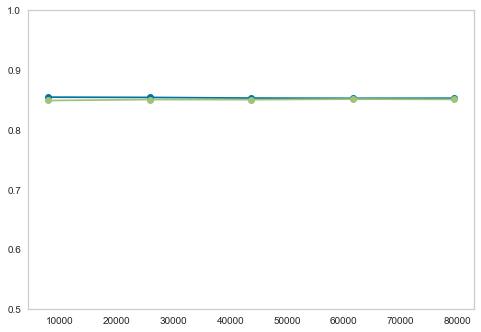

In [150]:
curves = learning_curve(xgb, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

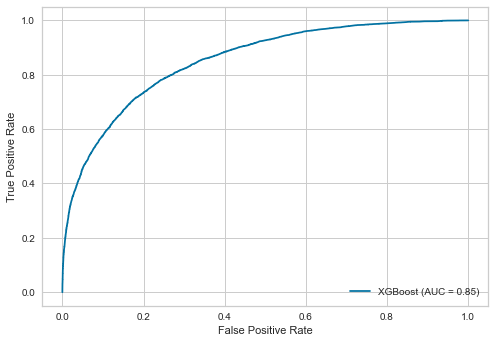

In [151]:
xgb.fit(X_train, y_train)
plot_roc_curve(xgb, X_test, y_test, name='XGBoost')

In [152]:
wind_score = xgb.score(X_test, y_test)
wind_score

0.8386446960235284

In [153]:
score_recall = recall_score(y_test, xgb.predict(X_test))
score_recall

0.4190667152752461

In [154]:
score_precision = precision_score(y_test, xgb.predict(X_test))
score_precision

0.7375681745267886

## Conclusion

The logistic regression still seems to be the best option in terms of 'RECALL' scores

In [155]:
rain_scores = scores('Model 7 - XGBoost', wind_score, score_precision, score_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression),Model 4 + Wind Speed (Log. Regression),Model 5 - Decision Tree,Model 6 - Random Forest,Model 7 - XGBoost
SCORE,0.995824,0.834420,0.829569,0.836429,0.834938,0.823899,0.838645
PRECISION,0.990995,0.734578,0.716671,0.712709,0.725666,0.831254,0.737568
RECALL,0.990005,0.386807,0.400000,0.435472,0.407131,0.255013,0.419067


In [156]:
# Same features appearing as important

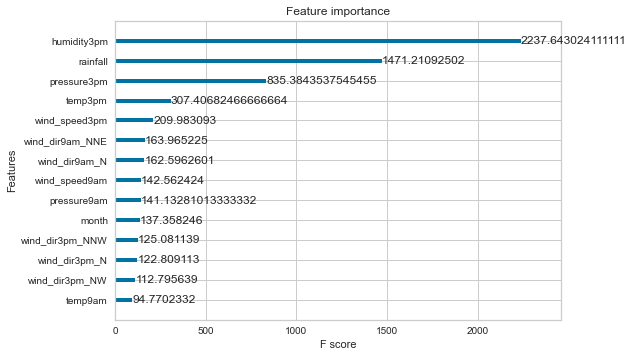

In [156]:
from xgboost import plot_importance

plot_importance(xgb, importance_type='gain')

# KNN Model

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
y=rain_wind['raintomorrow']
X=rain_wind.drop(columns=['raintomorrow', 'modelo_vigente'])

In [159]:
knn_75 = KNeighborsClassifier(n_neighbors=75, p=1, n_jobs=-1)

In [160]:
results = cross_val_score(knn_75, X, y, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8619154317471182, 0.00461858787679175)

In [161]:
knn_75.fit(X_train, y_train)
ypred_knn = knn_75.predict(X_test)
ypred_train_knn = knn_75.predict(X_train)
roc_dist_knn = {'test': roc_auc_score(y_test,ypred_knn),'train': roc_auc_score(y_train,ypred_train_knn)}

In [162]:
wind_score=knn_75.score(X,y)
wind_score

0.8479271584545345

In [163]:
score_recall = recall_score(y, knn_75.predict(X))
score_recall

0.42616018373373193

In [164]:
precision_recall = precision_score(y, knn_75.predict(X))
precision_recall

0.7886924841451896

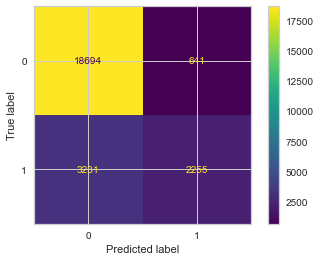

In [265]:
plot_confusion_matrix(knn_75, X_test, y_test, values_format='.0f')

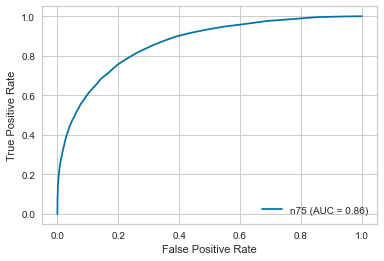

In [266]:
fig, ax = plt.subplots()
plot_roc_curve(knn_75, X_test, y_test, ax=ax, name = 'n75')

## Conclusion

The logistic regression still seems to be the best option in terms of 'RECALL' scores

In [165]:
rain_scores = scores('Model 8 - KNN', wind_score, score_precision, score_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression),Model 4 + Wind Speed (Log. Regression),Model 5 - Decision Tree,Model 6 - Random Forest,Model 7 - XGBoost,Model 8 - KNN
SCORE,0.995824,0.834420,0.829569,0.836429,0.834938,0.823899,0.838645,0.847927
PRECISION,0.990995,0.734578,0.716671,0.712709,0.725666,0.831254,0.737568,0.737568
RECALL,0.990005,0.386807,0.400000,0.435472,0.407131,0.255013,0.419067,0.426160


# LightGBM

In [177]:
y=rain_wind['raintomorrow']
X=rain_wind.drop(columns=['raintomorrow', 'modelo_vigente'])

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

In [179]:
lgb = LGBMClassifier(max_depth=1, n_estimators=100, colsample_bytree=.7, n_jobs=-1)

In [180]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8478349029314541, 0.0031615221383966136)

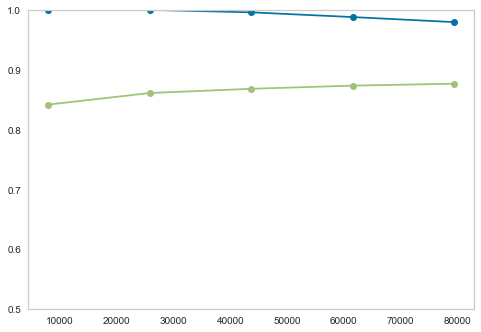

In [198]:
curves = learning_curve(lgb, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

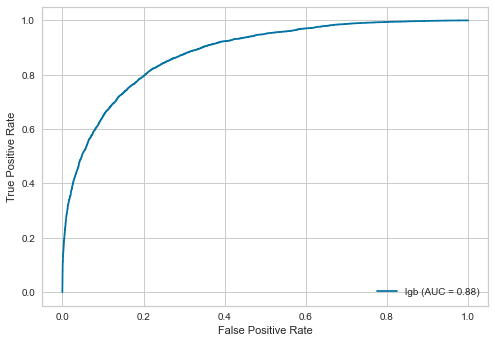

In [199]:
fig, ax = plt.subplots()
lgb.fit(X_train, y_train)
plot_roc_curve(lgb, X_test, y_test, ax=ax, name = 'lgb')

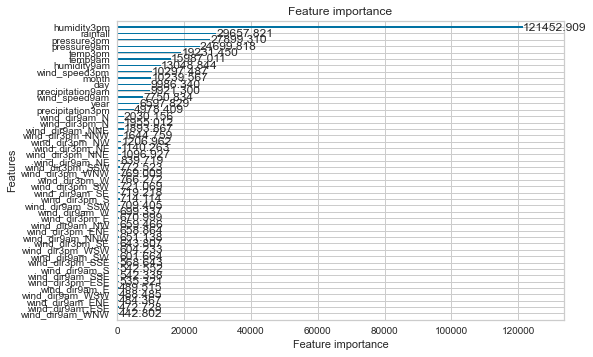

In [200]:
plot_importance(lgb, importance_type='gain')

## Tunning Parameters

### Leaf-wise

num_leaves. This is the main parameter to control the complexity of the tree model. Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than 2^(max_depth). For example, when the max_depth=7 the depth-wise tree can get good accuracy, but setting num_leaves to 127 may cause over-fitting, and setting it to 70 or 80 may get better accuracy than depth-wise.

min_data_in_leaf. This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and num_leaves. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

max_depth. You also can use max_depth to limit the tree depth explicitly.

#### num_leaves

In [192]:
lgb = LGBMClassifier(max_depth=5, num_leaves=32, n_estimators=100, colsample_bytree=.7, n_jobs=-1)

In [193]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8711481783894752, 0.0036129108665285147)

#### min_data_in_leaf

In [194]:
lgb = LGBMClassifier(max_depth=5, num_leaves=32, min_data_in_leaf=6, n_estimators=100, colsample_bytree=.7, n_jobs=-1)

In [195]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8708498092100958, 0.0018471083993671037)

#### n_estimators

In [196]:
lgb = LGBMClassifier(max_depth=5, num_leaves=32, min_data_in_leaf=6, n_estimators=1500, colsample_bytree=.7, n_jobs=-1)

In [197]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8783071995248362, 0.004244270343565193)

### For fast speed

In [183]:
lgb = LGBMClassifier(max_depth=5, num_leaves=32, min_data_in_leaf=6, n_estimators=1000, 
                     bagging_fraction=1, bagging_freq=3, feature_fraction=1,
                     max_bin=10,
                     colsample_bytree=.7, n_jobs=-1)

In [184]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8754383862303564, 0.00478423880476924)

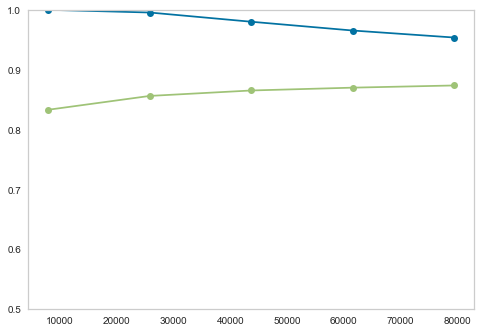

In [185]:
curves = learning_curve(lgb, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

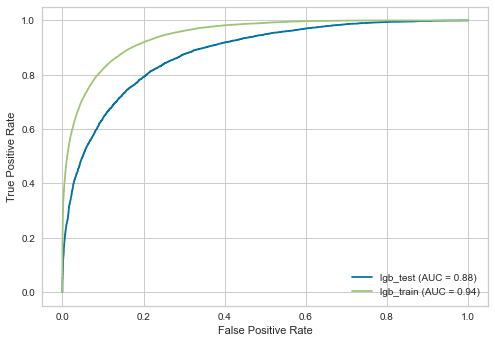

In [186]:
fig, ax = plt.subplots()
lgb.fit(X_train, y_train)
plot_roc_curve(lgb, X_test, y_test, ax=ax, name = 'lgb_test')
plot_roc_curve(lgb, X_train, y_train, ax=ax, name = 'lgb_train')

In [187]:
score=lgb.score(X,y)
score

0.8862414890616817

In [188]:
score_recall = recall_score(y, lgb.predict(X))
score_recall

0.6120812219751376

In [190]:
score_precision = precision_score(y, lgb.predict(X))
score_precision

0.8284403217052351

## Conclusion

The LightGBM seems to be the best model

In [191]:
rain_scores = scores('Model 9 - LGBM', score, score_precision, score_recall)
rain_scores

,Baseline (Log. Regression),Baseline 2 (Log. Regression),Model 3 + Wind Speed (Log. Regression),Model 4 + Wind Speed (Log. Regression),Model 5 - Decision Tree,Model 6 - Random Forest,Model 7 - XGBoost,Model 8 - KNN,Model 9 - LGBM
SCORE,0.995824,0.834420,0.829569,0.836429,0.834938,0.823899,0.838645,0.847927,0.886241
PRECISION,0.990995,0.734578,0.716671,0.712709,0.725666,0.831254,0.737568,0.737568,0.828440
RECALL,0.990005,0.386807,0.400000,0.435472,0.407131,0.255013,0.419067,0.426160,0.612081


# SVM

In [175]:
from sklearn.svm import SVC

In [185]:
rw_sample = rain_wind.query('year >= 2016')

In [191]:
rw_sample.head()

,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintomorrow,precipitation3pm,precipitation9am,...,wind_dir3pm_NNW,wind_dir3pm_NW,wind_dir3pm_S,wind_dir3pm_SE,wind_dir3pm_SSE,wind_dir3pm_SSW,wind_dir3pm_SW,wind_dir3pm_W,wind_dir3pm_WNW,wind_dir3pm_WSW
2474,0.0,46.0,17.0,1013.4,1009.2,26.1,36.7,0,13,18.621773,...,0,0,0,0,0,0,0,0,0,0
2475,0.4,54.0,30.0,1011.1,1008.4,24.8,31.7,1,10,8.049452,...,0,0,0,1,0,0,0,0,0,0
2476,2.2,62.0,67.0,1014.0,1014.8,21.8,19.5,1,15,8.813510,...,0,0,0,0,0,0,0,0,0,0
2477,15.6,74.0,65.0,1017.9,1016.5,19.2,21.6,1,10,10.516092,...,0,0,0,0,1,0,0,0,0,0
2478,6.8,92.0,63.0,1016.3,1013.9,17.2,22.2,0,13,14.502296,...,0,0,0,0,1,0,0,0,0,0


In [210]:
y = rw_sample.raintomorrow
X = rw_sample.drop(columns=['raintomorrow', 'modelo_vigente'])
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify=y)

In [211]:
svm = SVC(kernel='rbf', gamma=200, probability=True, max_iter = 2000,)
svm.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=200, kernel='rbf',
    max_iter=2000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
# Running cross validation
scorings = ['accuracy', 'precision', 'recall', 'roc_auc']
mean_results = []

for scoring in scorings:
    results = cross_val_score(svm, X_train, y_train, 
                              cv = TimeSeriesSplit (12),
                              scoring= scoring, 
                              n_jobs=-1)
    mean_results.append([np.mean(results), np.std(results)])

# Storing results in a DataFrame:
pd.DataFrame(mean_results, columns=['mean_svm', 'std_svm'], index=scorings)

,mean_svm,std_svm
accuracy,0.520507,0.255950
precision,0.117640,0.117895
recall,0.489234,0.489249
roc_auc,0.512911,0.013617


## Conclusion

Not using SVM since the used parameters don't seem to add any value

In [213]:
svm.score(X_test, y_test)

0.26313374627208075

# Selecting features for better Results

Analyzing the resulting scores of all models (almost the same), we decided to change the input and evaluate the impact

In [173]:
r = pd.read_csv('./data/rain_data_aus.csv')

In [174]:
# adding wind 
w = pd.DataFrame()
for i in range(1,9):
    df_aux = pd.read_csv(f'./data/wind_table_0{i}.csv')
    df_aux.columns = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']
    w = pd.concat([w,df_aux])
r_w =  pd.merge(r, w, how='left', on=['date', 'location'])

In [175]:
# CONVERTING LOCATION INTO LAT|LONG

In [176]:
from opencage.geocoder import OpenCageGeocode

key = '46b48d2d3d8f4acb88f582e3a83cbe77'
geocoder = OpenCageGeocode(key)

city_lat = {}
city_lng = {}

for city in r_w['location'].unique():
    query = f'{city}, Australia'
    results = geocoder.geocode(query)
    city_lat[city] =results[0]['geometry']['lat']
    city_lng[city] =results[0]['geometry']['lng']

In [177]:
cities = pd.DataFrame(data=[city_lat,city_lng]).T
cities = cities.reset_index()
cities.columns= ['location','lat','lng']
rw = pd.merge(left=r_w,
                    right=cities,
                    on='location')

In [178]:
rw.head(2)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,lat,lng
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.11536,0.089825,W,44.0,W,WNW,20.0,24.0,-36.080477,146.91628
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.49710,0.023477,WNW,44.0,NNW,WSW,4.0,22.0,-36.080477,146.91628


In [179]:
rw.shape

(164386, 31)

## Choosing relevant features 

### Preventing data leakage

In [180]:
# Removing features that wouldn't be available at the same day

In [181]:
rw = rw.drop(['mintemp','maxtemp','temp','humidity','evaporation','sunshine','cloud9am','cloud3pm', 
              'raintoday','amountOfRain', 'wind_gustdir','wind_gustspeed'], axis=1)

In [182]:
rw.head(2)

,date,location,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintomorrow,precipitation3pm,precipitation9am,modelo_vigente,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,lat,lng
0,2008-12-01,Albury,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,No,12,5.11536,0.089825,W,WNW,20.0,24.0,-36.080477,146.91628
1,2008-12-02,Albury,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,10,21.49710,0.023477,NNW,WSW,4.0,22.0,-36.080477,146.91628


## Analyzing relevance by correlation

In [183]:
rw.describe().T

,count,mean,std,min,25%,50%,75%,max
rainfall,162767.0,2.354322,8.417735,0.000000,0.000000,0.000000,0.800000,371.000000
humidity9am,162352.0,69.084495,18.993050,0.000000,57.000000,70.000000,83.000000,100.000000
humidity3pm,159262.0,51.669563,20.760959,0.000000,37.000000,52.000000,66.000000,100.000000
pressure9am,148085.0,1017.645456,7.129291,980.500000,1012.900000,1017.600000,1022.400000,1041.000000
pressure3pm,148113.0,1015.245303,7.056098,977.100000,1010.400000,1015.200000,1020.000000,1039.600000
temp9am,163410.0,16.949420,6.494967,-7.200000,12.200000,16.600000,21.500000,40.200000
temp3pm,160309.0,21.633172,6.932849,-5.400000,16.600000,21.100000,26.400000,46.700000
precipitation3pm,164386.0,10.014612,3.174691,0.000000,8.000000,10.000000,12.000000,26.000000
precipitation9am,164386.0,9.995438,4.998239,-17.739346,6.646014,9.996363,13.379601,32.478590
modelo_vigente,164386.0,0.230207,0.269158,0.000000,0.032251,0.108306,0.337493,0.999400


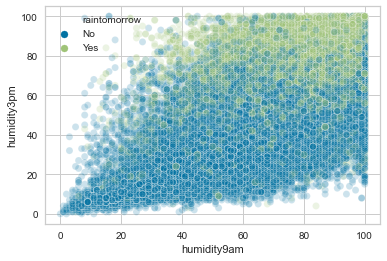

In [184]:
# humidity at 3pm seems to have more impact in raining
sns.scatterplot(x='humidity9am', y='humidity3pm', hue='raintomorrow' , alpha=.2, data=rw);

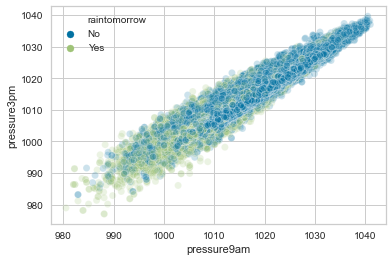

In [185]:
# pressure at both time seem to have the same impact in raining
sns.scatterplot(x='pressure9am', y='pressure3pm', hue='raintomorrow' , alpha=.2,data=rw);

In [3]:
rain = pd.read_csv('../data/rain_data_aus.csv')

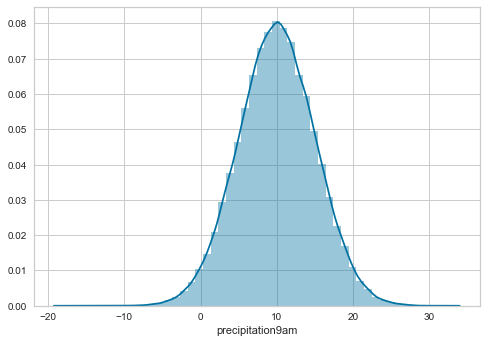

In [5]:
sns.distplot(rain.precipitation9am)

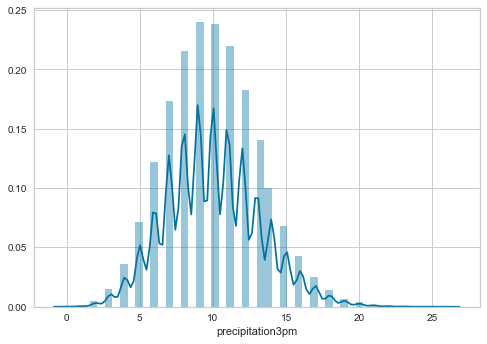

In [4]:
sns.distplot(rain.precipitation3pm)

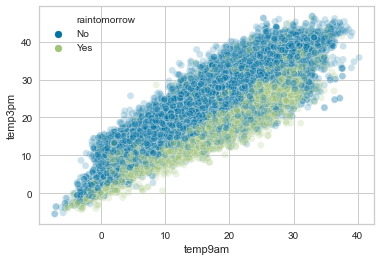

In [186]:
# temp at 3pm seems to have more impact in raining
sns.scatterplot(x='temp9am', y='temp3pm', hue='raintomorrow' , alpha=.2,data=rw);

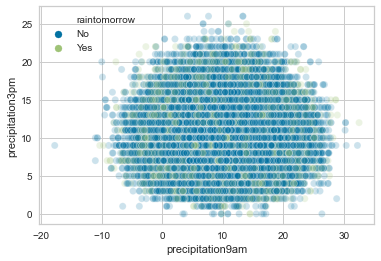

In [187]:
# precipitation at both time seem to have low impact in raining
sns.scatterplot(x='precipitation9am', y='precipitation3pm', hue='raintomorrow' , alpha=.2,data=rw);

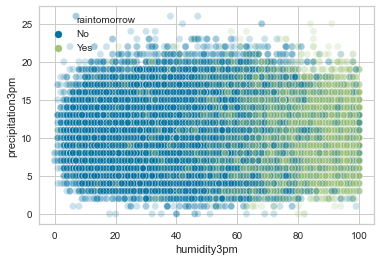

In [188]:
sns.scatterplot(x='humidity3pm', y='precipitation3pm', hue='raintomorrow' , alpha=.2,data=rw);

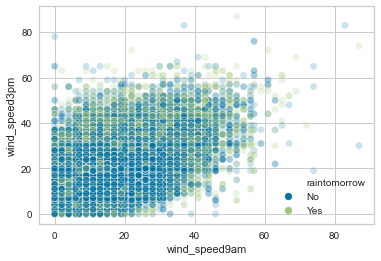

In [189]:
# wind speed at 3pm seems to have a little more impact in raining
sns.scatterplot(x='wind_speed9am', y='wind_speed3pm', hue='raintomorrow' , alpha=.2,data=rw);

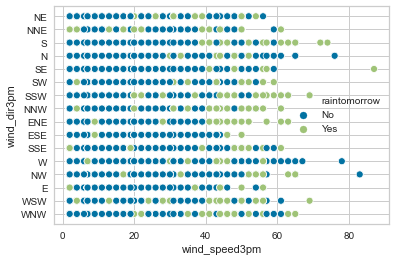

In [190]:
# some wind directions seem to be more influenced by their speed in causing rain
sns.scatterplot(x='wind_speed3pm', y='wind_dir3pm', hue='raintomorrow' ,data=rw);

In [191]:
# Based on correlation, all 9am features and precipitation won't be used

In [192]:
rw=rw.drop(columns=['humidity9am','pressure9am', 'temp9am','precipitation3pm', 'precipitation9am', 
                 'wind_speed9am','wind_dir9am'])

In [193]:
rw.head()

,date,location,rainfall,humidity3pm,pressure3pm,temp3pm,raintomorrow,modelo_vigente,wind_dir3pm,wind_speed3pm,lat,lng
0,2008-12-01,Albury,0.6,22.0,1007.1,21.8,No,0.089825,WNW,24.0,-36.080477,146.91628
1,2008-12-02,Albury,0.0,25.0,1007.8,24.3,No,0.023477,WSW,22.0,-36.080477,146.91628
2,2008-12-03,Albury,0.0,30.0,1008.7,23.2,No,0.027580,WSW,26.0,-36.080477,146.91628
3,2008-12-04,Albury,0.0,16.0,1012.8,26.5,No,0.023962,E,9.0,-36.080477,146.91628
4,2008-12-05,Albury,1.0,33.0,1006.0,29.7,No,0.220164,NW,20.0,-36.080477,146.91628


In [194]:
rw.shape

(164386, 12)

## Treating Missing values

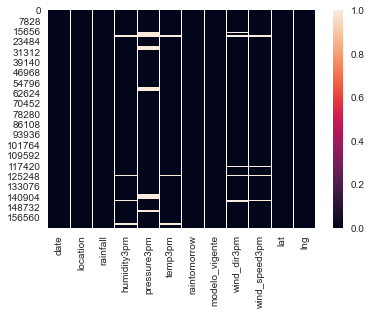

In [195]:
sns.heatmap(rw.isna())

In [196]:
rw=rw.dropna()
rw.shape

(142521, 12)

## Treating object columns

In [197]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142521 entries, 0 to 164385
Data columns (total 12 columns):
date              142521 non-null object
location          142521 non-null object
rainfall          142521 non-null float64
humidity3pm       142521 non-null float64
pressure3pm       142521 non-null float64
temp3pm           142521 non-null float64
raintomorrow      142521 non-null object
modelo_vigente    142521 non-null float64
wind_dir3pm       142521 non-null object
wind_speed3pm     142521 non-null float64
lat               142521 non-null float64
lng               142521 non-null float64
dtypes: float64(8), object(4)
memory usage: 14.1+ MB


In [198]:
rw.raintomorrow=rw.raintomorrow.apply(lambda x: 0 if x=='No' else 1)

In [199]:
# Transforming date into a numerical variable (days in a year and month)

In [200]:
rw.date = pd.to_datetime(rw.date)

In [201]:
rw['day']=rw.date.apply(lambda x: int(x.strftime('%j')))

In [202]:
rw['month']= rw.date.dt.month

In [203]:
rw.head()

,date,location,rainfall,humidity3pm,pressure3pm,temp3pm,raintomorrow,modelo_vigente,wind_dir3pm,wind_speed3pm,lat,lng,day,month
0,2008-12-01,Albury,0.6,22.0,1007.1,21.8,0,0.089825,WNW,24.0,-36.080477,146.91628,336,12
1,2008-12-02,Albury,0.0,25.0,1007.8,24.3,0,0.023477,WSW,22.0,-36.080477,146.91628,337,12
2,2008-12-03,Albury,0.0,30.0,1008.7,23.2,0,0.027580,WSW,26.0,-36.080477,146.91628,338,12
3,2008-12-04,Albury,0.0,16.0,1012.8,26.5,0,0.023962,E,9.0,-36.080477,146.91628,339,12
4,2008-12-05,Albury,1.0,33.0,1006.0,29.7,0,0.220164,NW,20.0,-36.080477,146.91628,340,12


In [204]:
rw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142521 entries, 0 to 164385
Data columns (total 14 columns):
date              142521 non-null datetime64[ns]
location          142521 non-null object
rainfall          142521 non-null float64
humidity3pm       142521 non-null float64
pressure3pm       142521 non-null float64
temp3pm           142521 non-null float64
raintomorrow      142521 non-null int64
modelo_vigente    142521 non-null float64
wind_dir3pm       142521 non-null object
wind_speed3pm     142521 non-null float64
lat               142521 non-null float64
lng               142521 non-null float64
day               142521 non-null int64
month             142521 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)
memory usage: 16.3+ MB


In [205]:
# turning wind direction into dummies

In [206]:
pd.get_dummies(rw.wind_dir3pm, drop_first=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
164382,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
164383,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
164384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [207]:
rw.head()

,date,location,rainfall,humidity3pm,pressure3pm,temp3pm,raintomorrow,modelo_vigente,wind_dir3pm,wind_speed3pm,lat,lng,day,month
0,2008-12-01,Albury,0.6,22.0,1007.1,21.8,0,0.089825,WNW,24.0,-36.080477,146.91628,336,12
1,2008-12-02,Albury,0.0,25.0,1007.8,24.3,0,0.023477,WSW,22.0,-36.080477,146.91628,337,12
2,2008-12-03,Albury,0.0,30.0,1008.7,23.2,0,0.027580,WSW,26.0,-36.080477,146.91628,338,12
3,2008-12-04,Albury,0.0,16.0,1012.8,26.5,0,0.023962,E,9.0,-36.080477,146.91628,339,12
4,2008-12-05,Albury,1.0,33.0,1006.0,29.7,0,0.220164,NW,20.0,-36.080477,146.91628,340,12


In [208]:
rw_dummies = pd.concat([rw, pd.get_dummies(rw.wind_dir3pm, drop_first=True)], axis=1)

## Clustering

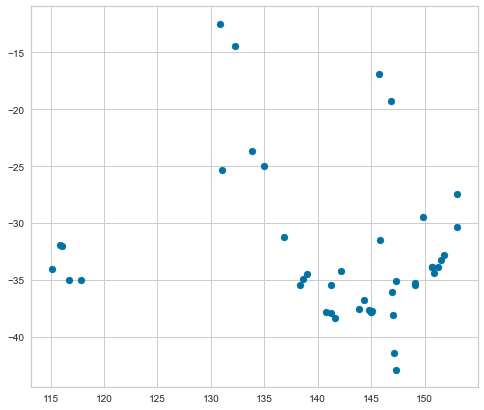

In [209]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(rw_dummies.lng.unique(), rw_dummies.lat.unique())

### First cluster:

In [210]:
from sklearn.preprocessing import StandardScaler
X =rw_dummies.groupby('location')['lat','lng','raintomorrow'].mean()
X_std = StandardScaler().fit_transform(X)

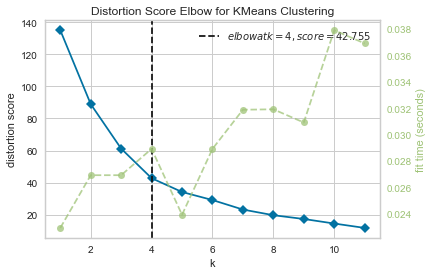

In [211]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [212]:
kmeans = KMeans(4)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [213]:
X['labels']=kmeans.labels_

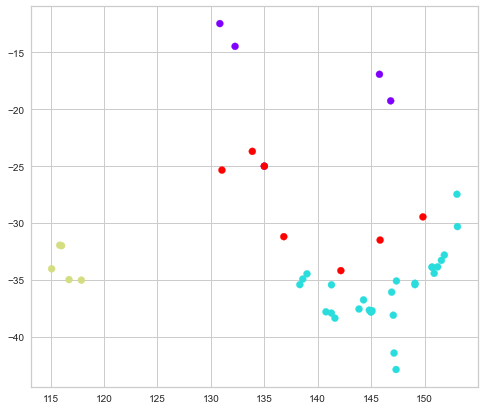

In [214]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(X.lng, X.lat,c=X.labels, cmap='rainbow')

In [215]:
cluster1 = X.drop(columns=['lat','lng','raintomorrow'])

In [216]:
rw_dummies['cluster_1'] = rw_dummies.location.apply(lambda x: cluster1.loc[x,'labels'])

In [217]:
rw_dummies.head(2)

,date,location,rainfall,humidity3pm,pressure3pm,temp3pm,raintomorrow,modelo_vigente,wind_dir3pm,wind_speed3pm,lat,lng,day,month,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,cluster_1
0,2008-12-01,Albury,0.6,22.0,1007.1,21.8,0,0.089825,WNW,24.0,-36.080477,146.91628,336,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2008-12-02,Albury,0.0,25.0,1007.8,24.3,0,0.023477,WSW,22.0,-36.080477,146.91628,337,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Second cluster

In [218]:
X=rw_dummies.groupby('location')['location','lat','lng','raintomorrow'].mean().reset_index()
coord = X[['lat','lng']]
pca = PCA(1)
pca.fit(coord)
X_coord = pca.transform(coord)
X['coord']= X_coord
X_std = StandardScaler().fit_transform(X[['coord','raintomorrow']])

In [219]:
kmeans = KMeans(4)
kmeans.fit(X_std)
kmeans.labels_

array([1, 2, 1, 3, 1, 1, 1, 1, 0, 1, 3, 1, 0, 2, 1, 1, 3, 1, 1, 1, 3, 3,
       0, 3, 1, 0, 1, 3, 2, 2, 0, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1,
       3])

In [220]:
X['labels']=kmeans.labels_

In [221]:
cluster2 = X[['location','labels'] ]

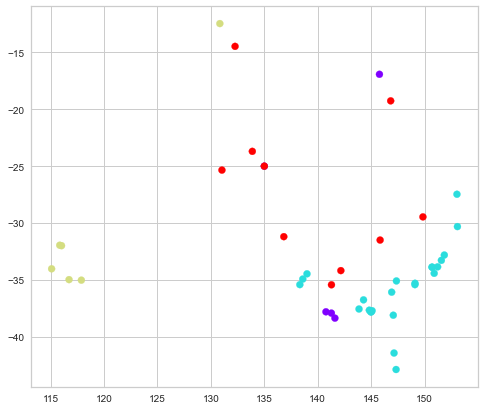

In [222]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(X.lng, X.lat,c=X.labels, cmap='rainbow')

In [223]:
cluster_dict={}
for i in range(cluster2.shape[0]):
    cluster_dict [cluster2.loc[i,'location']] = cluster2.loc[i,'labels']

In [224]:
rw_dummies['cluster_2'] = rw_dummies.location.apply(lambda x: cluster_dict.get(x))

In [225]:
rw_dummies.head()

,date,location,rainfall,humidity3pm,pressure3pm,temp3pm,raintomorrow,modelo_vigente,wind_dir3pm,wind_speed3pm,lat,lng,day,month,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,cluster_1,cluster_2
0,2008-12-01,Albury,0.6,22.0,1007.1,21.8,0,0.089825,WNW,24.0,-36.080477,146.91628,336,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,2008-12-02,Albury,0.0,25.0,1007.8,24.3,0,0.023477,WSW,22.0,-36.080477,146.91628,337,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,2008-12-03,Albury,0.0,30.0,1008.7,23.2,0,0.027580,WSW,26.0,-36.080477,146.91628,338,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,2008-12-04,Albury,0.0,16.0,1012.8,26.5,0,0.023962,E,9.0,-36.080477,146.91628,339,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2008-12-05,Albury,1.0,33.0,1006.0,29.7,0,0.220164,NW,20.0,-36.080477,146.91628,340,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Third cluster

In [226]:
df = rw_dummies[['date', 'location','lat','raintomorrow','lng']]

In [227]:
df['week']= pd.to_datetime(df['date']).dt.week

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
df.drop(columns=['date'],inplace=True)

C:\Users\julia\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [229]:
X= pd.crosstab(index=df['location'],
              columns=df['week'],values=df['raintomorrow'],aggfunc='mean')

In [230]:
X = X.drop(columns=53)

In [231]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='correlation', linkage='complete')
hierarchical.fit(X)

AgglomerativeClustering(affinity='correlation', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [232]:
X['cluster_3']=hierarchical.labels_

In [233]:
X = pd.merge(X,cities,on='location')

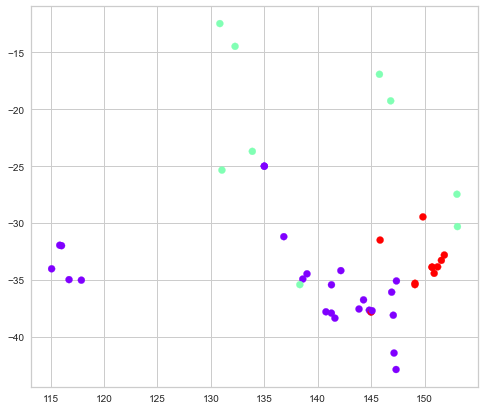

In [234]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(X.lng, X.lat,c=X.cluster_3, cmap='rainbow')

In [235]:
X.reset_index(drop=False, inplace=True)

In [236]:
X_cluster = X[['location','cluster_3']]

In [237]:
rw_dummies = pd.merge(left=rw_dummies,right=X_cluster,on='location')

In [238]:
rw_dummies.to_csv('./data/rw_clean.csv')

In [239]:
rw_dummies

,date,location,rainfall,humidity3pm,pressure3pm,temp3pm,raintomorrow,modelo_vigente,wind_dir3pm,wind_speed3pm,lat,lng,day,month,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,cluster_1,cluster_2,cluster_3
0,2008-12-01,Albury,0.6,22.0,1007.1,21.8,0,0.089825,WNW,24.0,-36.080477,146.916280,336,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,2008-12-02,Albury,0.0,25.0,1007.8,24.3,0,0.023477,WSW,22.0,-36.080477,146.916280,337,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,2008-12-03,Albury,0.0,30.0,1008.7,23.2,0,0.027580,WSW,26.0,-36.080477,146.916280,338,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,2008-12-04,Albury,0.0,16.0,1012.8,26.5,0,0.023962,E,9.0,-36.080477,146.916280,339,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,2008-12-05,Albury,1.0,33.0,1006.0,29.7,0,0.220164,NW,20.0,-36.080477,146.916280,340,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142516,2017-06-22,Uluru,0.0,21.0,1019.1,24.5,0,0.023350,N,9.0,-25.345554,131.036961,173,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1
142517,2017-06-23,Uluru,0.0,24.0,1016.8,26.1,0,0.007195,WNW,9.0,-25.345554,131.036961,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,1
142518,2017-06-23,Uluru,0.0,24.0,1016.8,26.1,0,0.007195,WNW,9.0,-25.345554,131.036961,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,1
142519,2017-06-24,Uluru,0.0,24.0,1016.5,26.0,0,0.018811,N,7.0,-25.345554,131.036961,175,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1


# Ultimate Model Comparison

After choosing some features, we ran 3 models a last time in order to compare the model's performance in clustered X non clustered dataset

- Logistic Regression
- Light GBM
- Decision Tree

## Running 3 models to dataset - no cluster

In [163]:
rw = pd.read_csv('../data/rw_clean.csv', index_col=0)
rw=rw.drop(columns=['date','wind_dir3pm','modelo_vigente','location', 'cluster_1', 'cluster_2', 'cluster_3'])
y = rw.raintomorrow
X = rw.drop('raintomorrow', axis=1)
lgb = LGBMClassifier(max_depth=5, num_leaves=32, min_data_in_leaf=6, 
             learning_rate=0.001, n_estimators=1000, 
             bagging_fraction=1, bagging_freq=2, feature_fraction=1,
             max_bin=5,
             colsample_bytree=.7, n_jobs=-1)
results = cross_val_score(lgb, X, y, cv=KFold(4, shuffle=True), scoring='roc_auc')
lgbm_nocluster=np.mean(results)
log = LogisticRegression(n_jobs=-1)
results = cross_val_score(log, X, y, cv=KFold(4, shuffle=True), scoring='roc_auc')
logistic_nocluster=np.mean(results)
tree_m = DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001,random_state=42)
results = cross_val_score(tree_m, X, y, cv=KFold(4, shuffle=True), scoring='roc_auc')
tree_nocluster=np.mean(results)

## Running 3 models to dataset - 4 clusters

In [161]:
from lightgbm import LGBMClassifier
rw = pd.read_csv('../data/rw_clean.csv', index_col=0)
rw=rw.drop(columns=['date','wind_dir3pm','modelo_vigente','location'])
df_aux=[]
lgbm={}
logistic={}
tree = {}
for x in range(1,4):
    for i in range(0,rw[f'cluster_{x}'].unique().max()+1):
        df_aux =rw[(rw[f'cluster_{x}'] == i)]
        df_aux = df_aux.drop(['lat', 'lng', 'cluster_1', 'cluster_2', 'cluster_3'], axis=1)
        y = df_aux.raintomorrow
        X = df_aux.drop('raintomorrow', axis=1)
        lgb = LGBMClassifier(max_depth=5, num_leaves=32, min_data_in_leaf=6, 
                     learning_rate=0.001, n_estimators=1000, 
                     bagging_fraction=1, bagging_freq=2, feature_fraction=1,
                     max_bin=5,
                     colsample_bytree=.7, n_jobs=-1)
        results = cross_val_score(lgb, X, y, cv=KFold(4, shuffle=True), scoring='roc_auc')
        name=f'modelo {x} cluster {i}'
        lgbm[name]=(np.mean(results), np.std(results))
        log = LogisticRegression(n_jobs=-1)
        results = cross_val_score(log, X, y, cv=KFold(4, shuffle=True), scoring='roc_auc')
        logistic[name]=(np.mean(results), np.std(results))
        tree_m = DecisionTreeClassifier(max_depth=5,ccp_alpha=0.001,random_state=42)
        results = cross_val_score(tree_m, X, y, cv=KFold(4, shuffle=True), scoring='roc_auc')
        tree[name]=(np.mean(results), np.std(results))
        

## Conclusion

- Creating clusters enhanced our model, showing that different models for each cluster will bring better results

- Among all models, the Light GBM was the one that brought the best result


In [174]:
pd.DataFrame([[lgbm_nocluster,pd.DataFrame(lgbm).T[0].mean()],
              [logistic_nocluster, pd.DataFrame(logistic).T[0].mean()],
            [tree_nocluster, pd.DataFrame(tree).T[0].mean()]], 
             columns=['No cluster','Cluster'],
            index=['Light GBM', 'Logistic Regression', 'Decision Tree'])

,No cluster,Cluster
Light GBM,0.843890,0.856764
Logistic Regression,0.820242,0.842147
Decision Tree,0.815786,0.827583


# Deploy (?)